### Jeffrey Bradley and Taylor Tucker
### Prof. Watson
### CSCI 297
### 10/3/2020

##### Imports

In [2]:
pip install pydotplus

Processing c:\users\jeffr\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36\pydotplus-2.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

In [6]:
DF1 = pd.read_csv('diabetes.csv')
DF1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
DF1.shape

(768, 9)

### Show Distribution

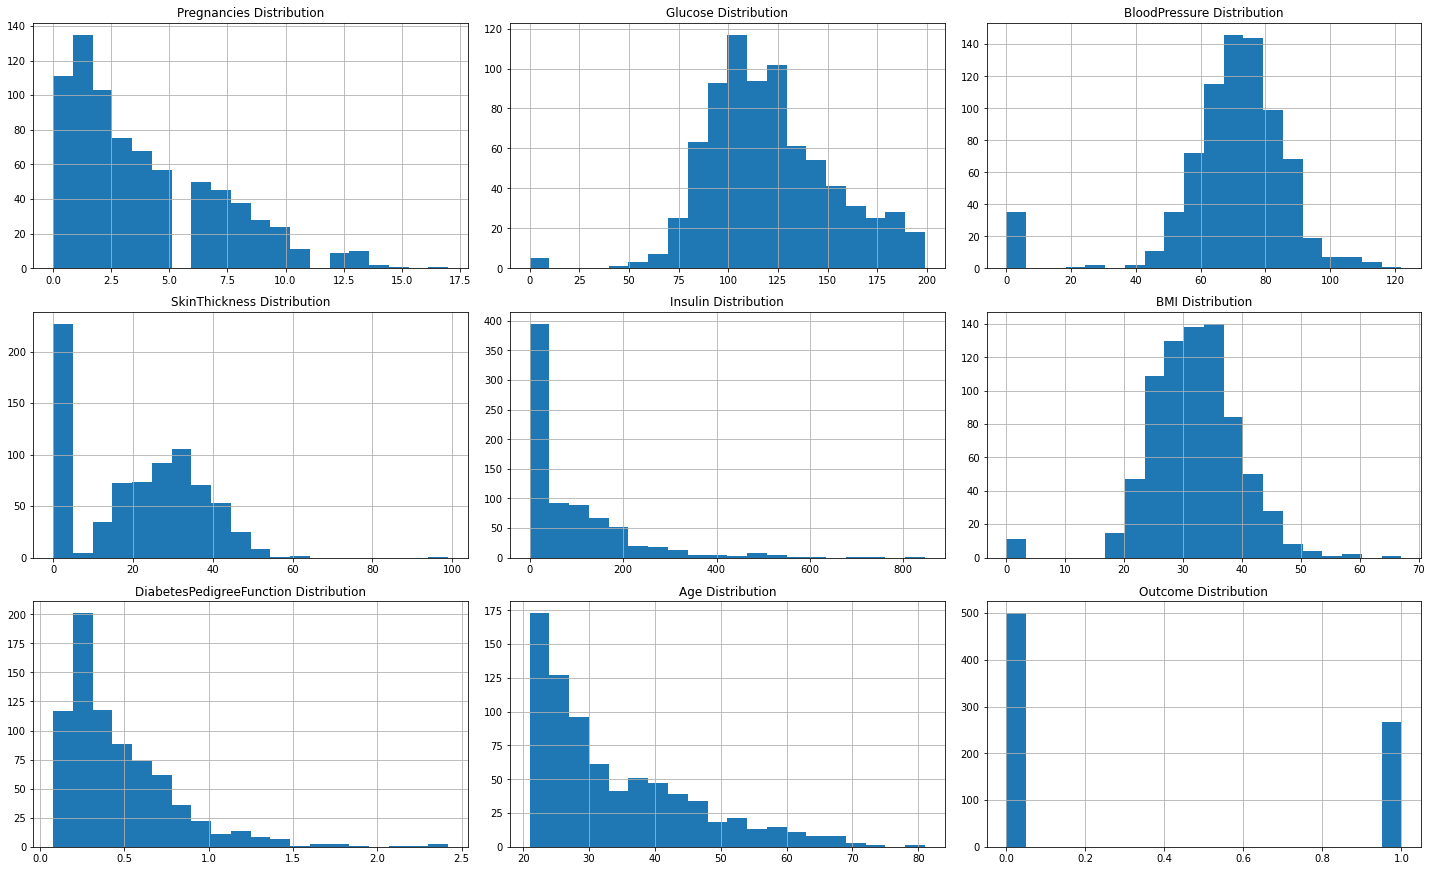

In [14]:
fig=plt.figure(figsize=(20,20))
for key,column in enumerate(DF1.columns):
    #print(key)
    ax = fig.add_subplot(5,3,key+1)
    DF1[column].hist(bins=20,ax=ax)
    ax.set_title(column + " Distribution")
fig.tight_layout()  
plt.show()

### Show Correlations

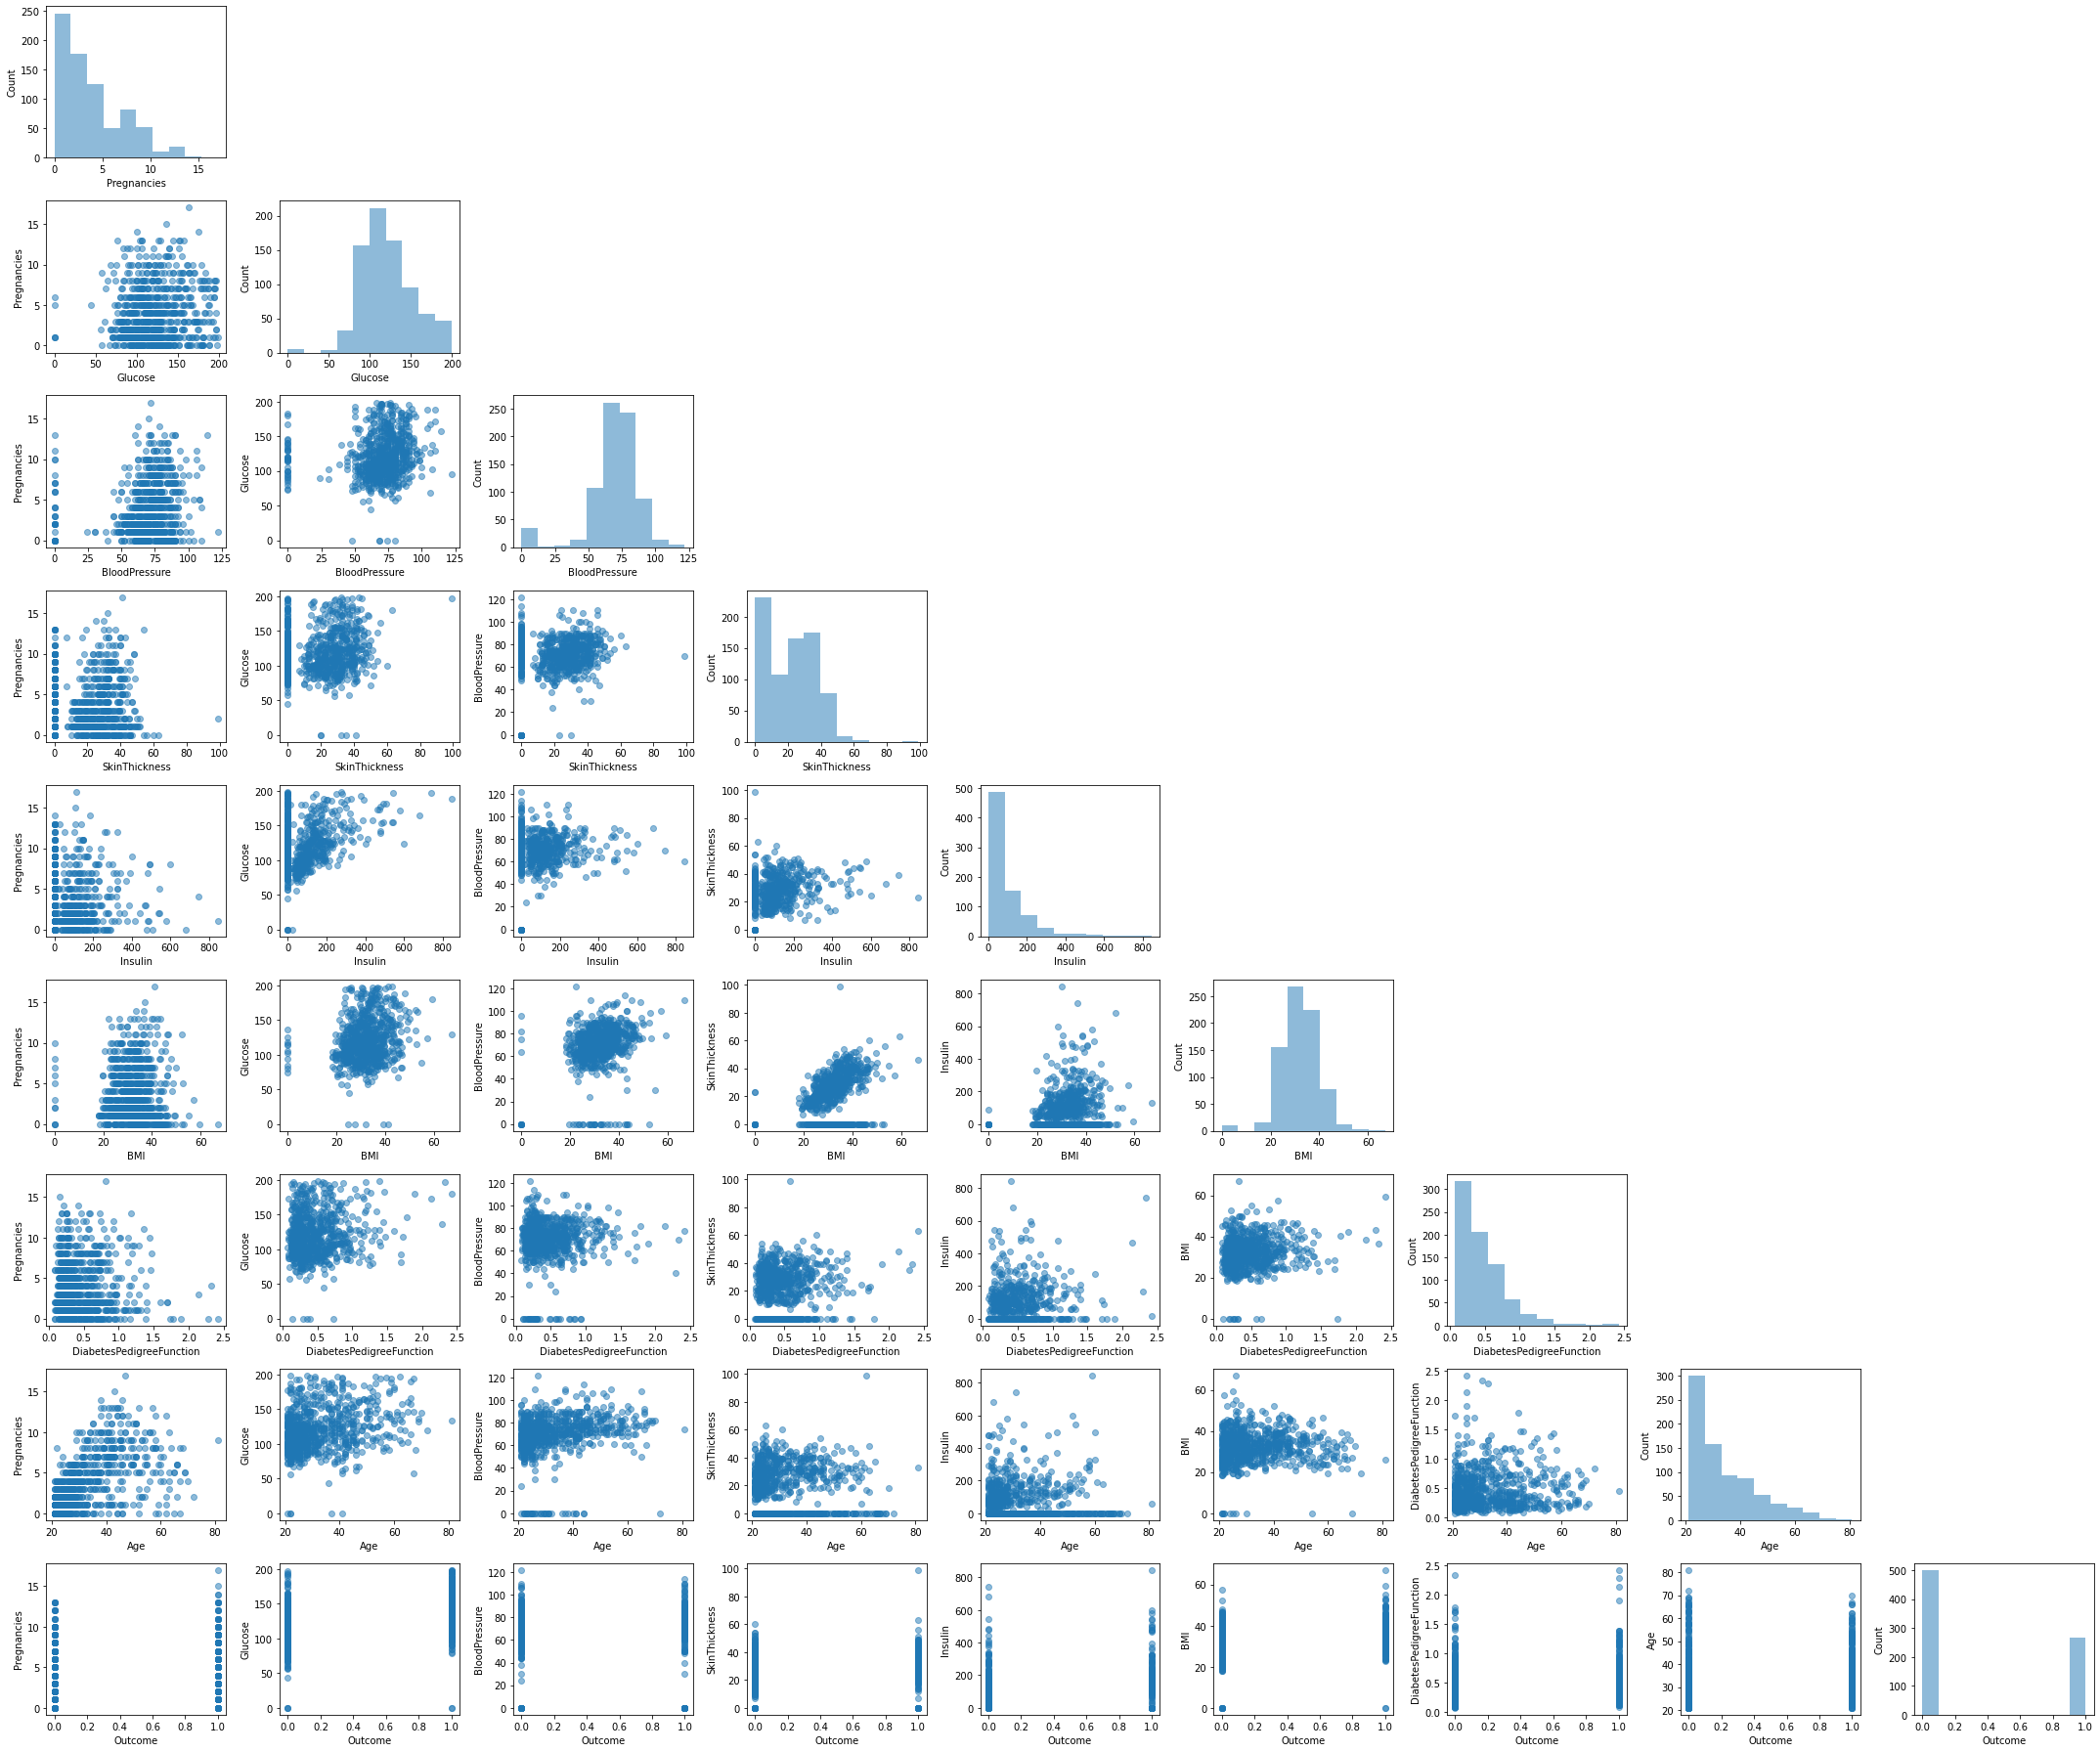

In [17]:
scatterplotmatrix(DF1[DF1.columns].values, figsize=(30, 25),names=DF1.columns, alpha=0.5)
plt.tight_layout()
figure = plt.gcf()
figure.savefig('ScatterMatrix.png')
plt.show()

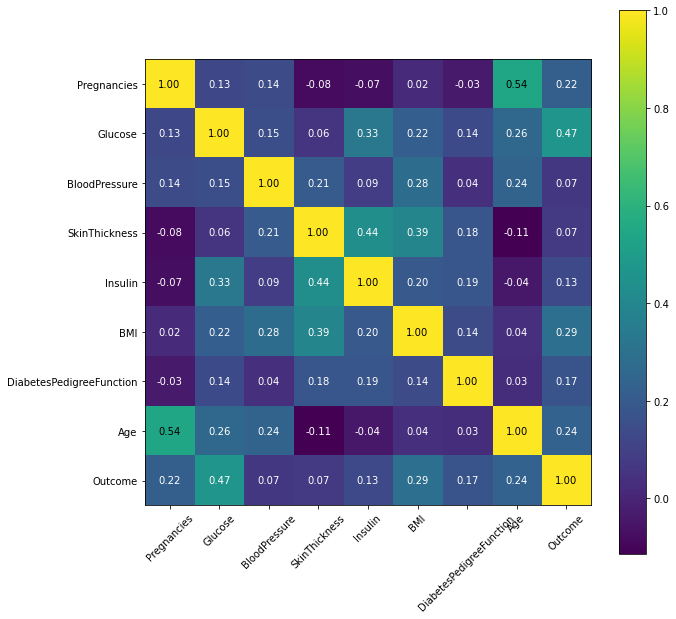

In [20]:
cm = np.corrcoef(DF1[DF1.columns].values.T)
hm = heatmap(cm, row_names=DF1.columns, column_names=DF1.columns, figsize = (10,10))
plt.show()

#### Low linear correlations

## Building a decision tree

#### Import necessary functions

In [27]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

#### Define dependent and independent variables

In [23]:
x = DF1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
y = DF1[['Outcome']]

#### Train/Test Split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y, shuffle = True)

#### Parameters to try

In [79]:
criterion = ['gini', 'entropy']
depth = [x for x in range(2,6)]

### Trees of different hyperparamters with accuracy 



Accuracy for gini with depth  2 :  0.7402597402597403
Feature Importances: 

Pregnancies: 0.0
Glucose: 0.7769909340304896
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.22300906596951042
DiabetesPedigreeFunction: 0.0
Age: 0.0


Accuracy for gini with depth  3 :  0.7316017316017316
Feature Importances: 

Pregnancies: 0.0
Glucose: 0.7420310527618875
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.17922072415993903
DiabetesPedigreeFunction: 0.019137896722764947
Age: 0.05961032635540847


Accuracy for gini with depth  4 :  0.7272727272727273
Feature Importances: 

Pregnancies: 0.02954505186647875
Glucose: 0.617752558444884
BloodPressure: 0.0
SkinThickness: 0.016371066138638174
Insulin: 0.0
BMI: 0.18512550689054957
DiabetesPedigreeFunction: 0.08349683958027432
Age: 0.06770897707917535


Accuracy for gini with depth  5 :  0.7056277056277056
Feature Importances: 

Pregnancies: 0.07316615799092906
Glucose: 0.5214671281754633
BloodPressure: 0.0
SkinThickness: 0.0134350354

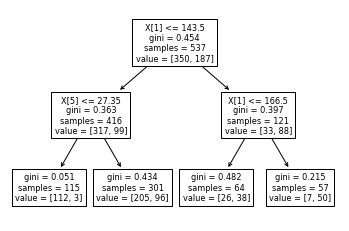

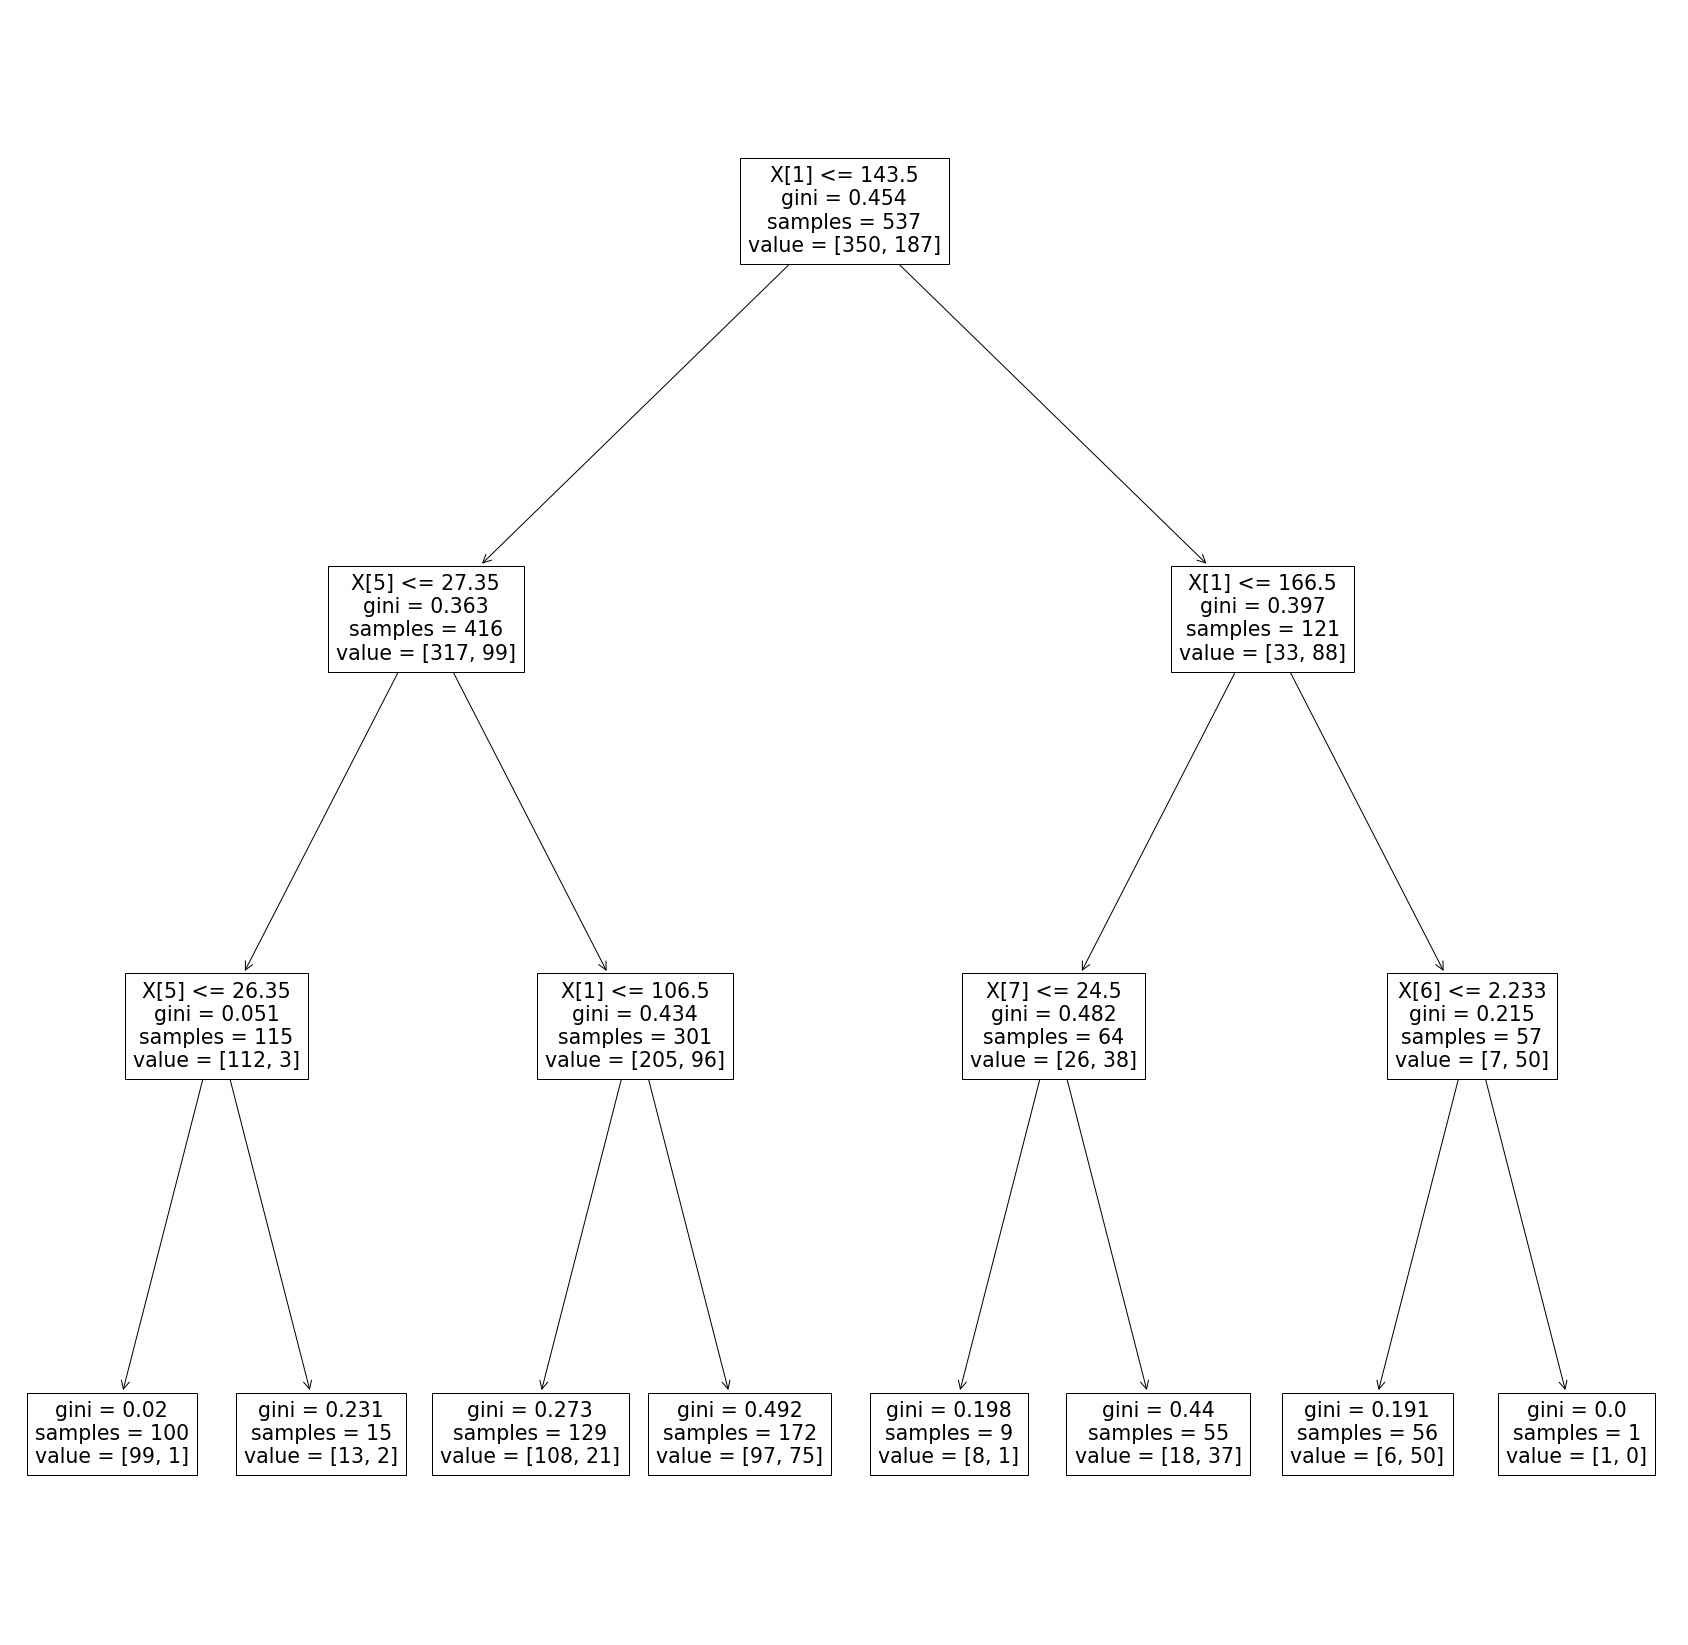

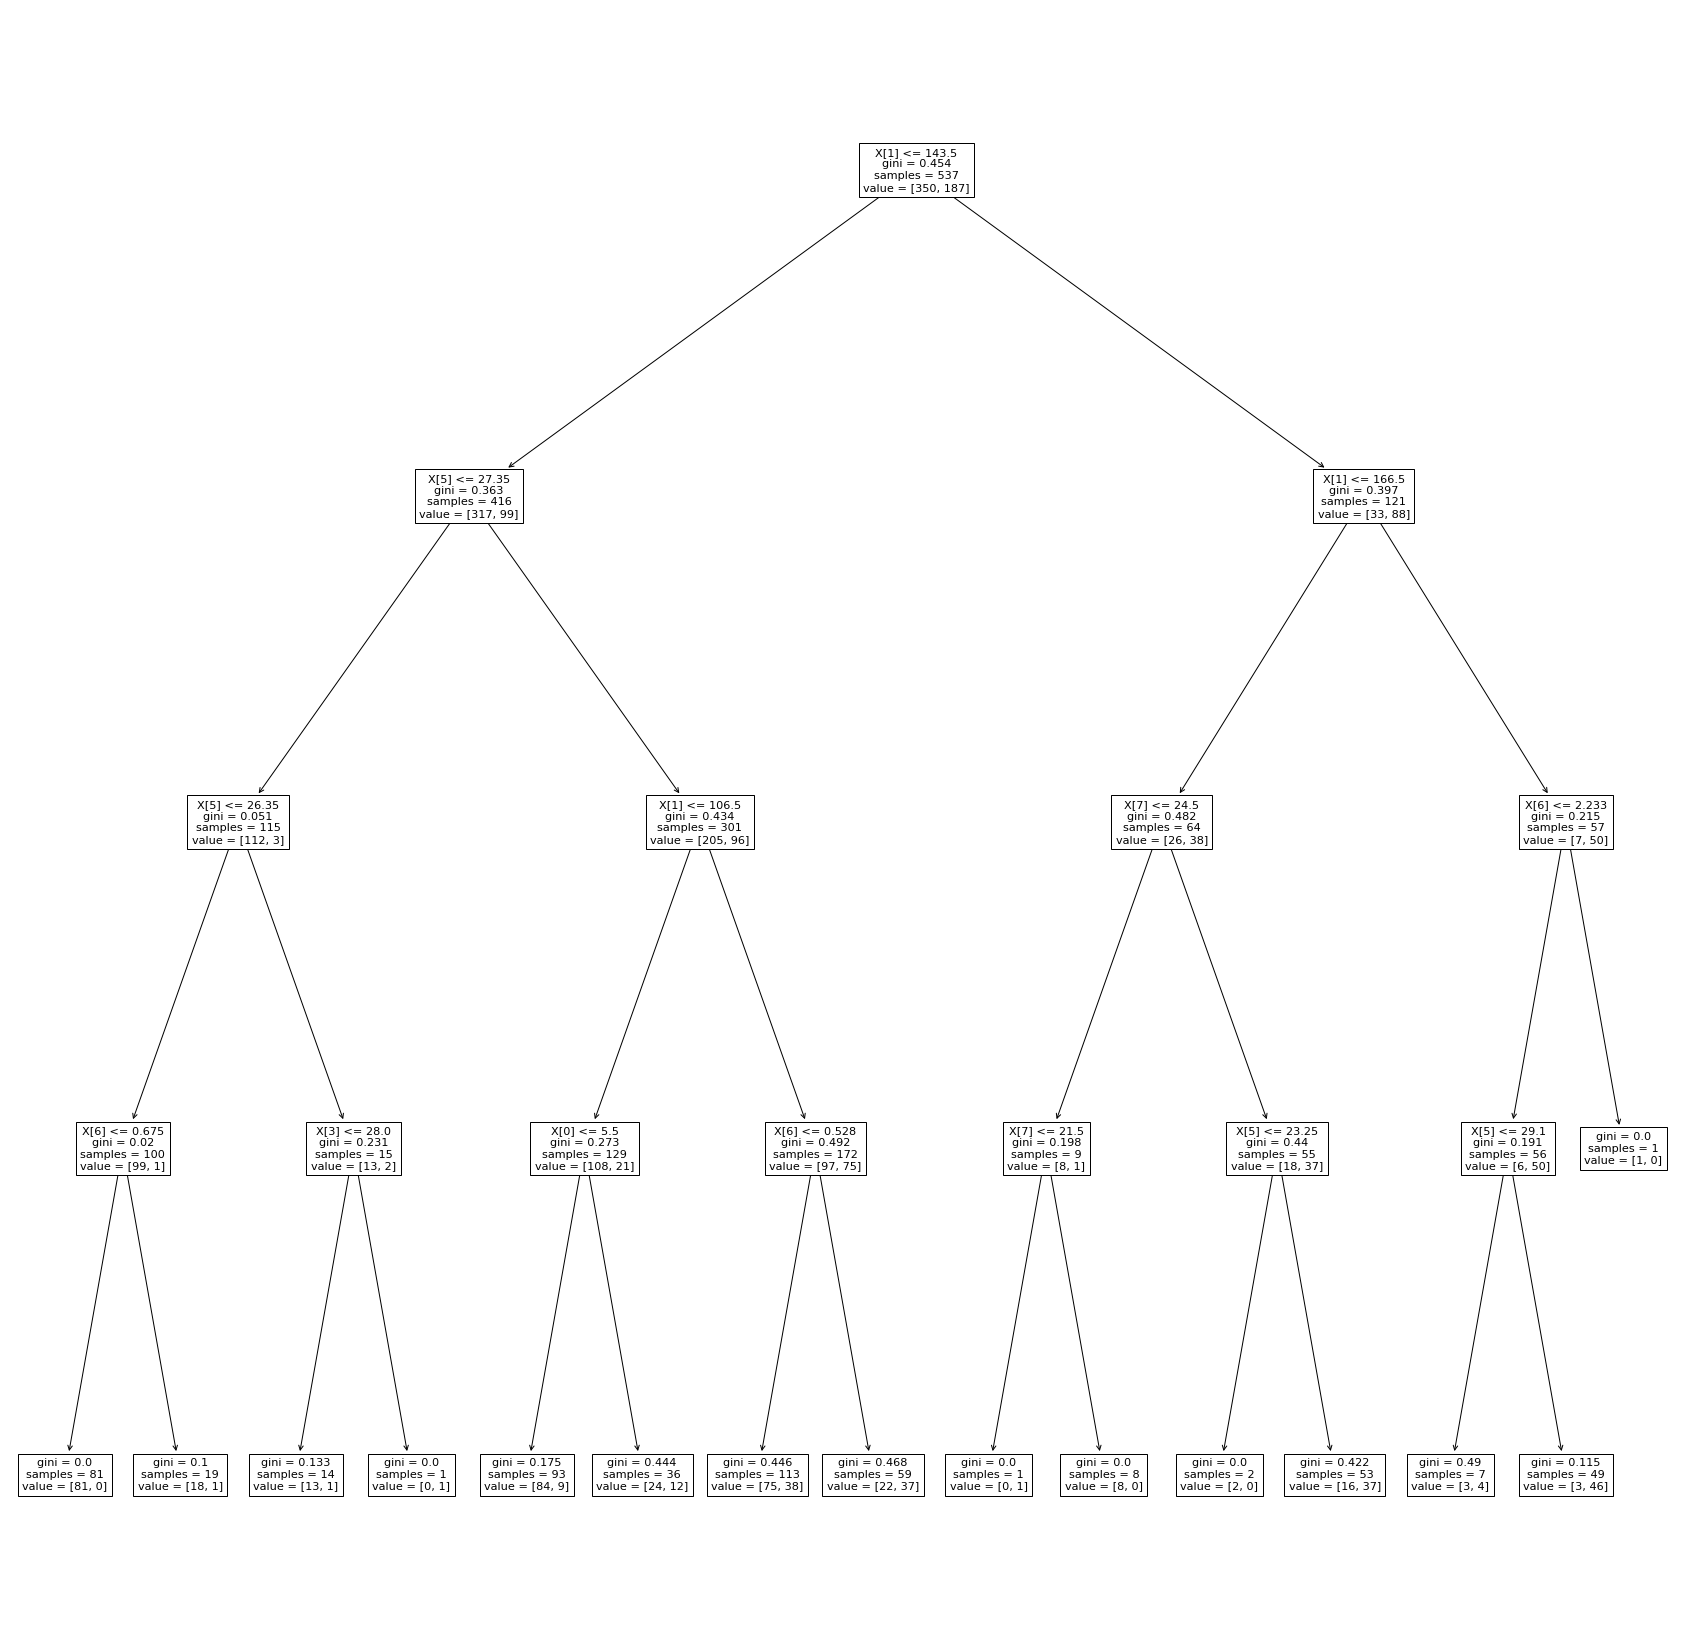

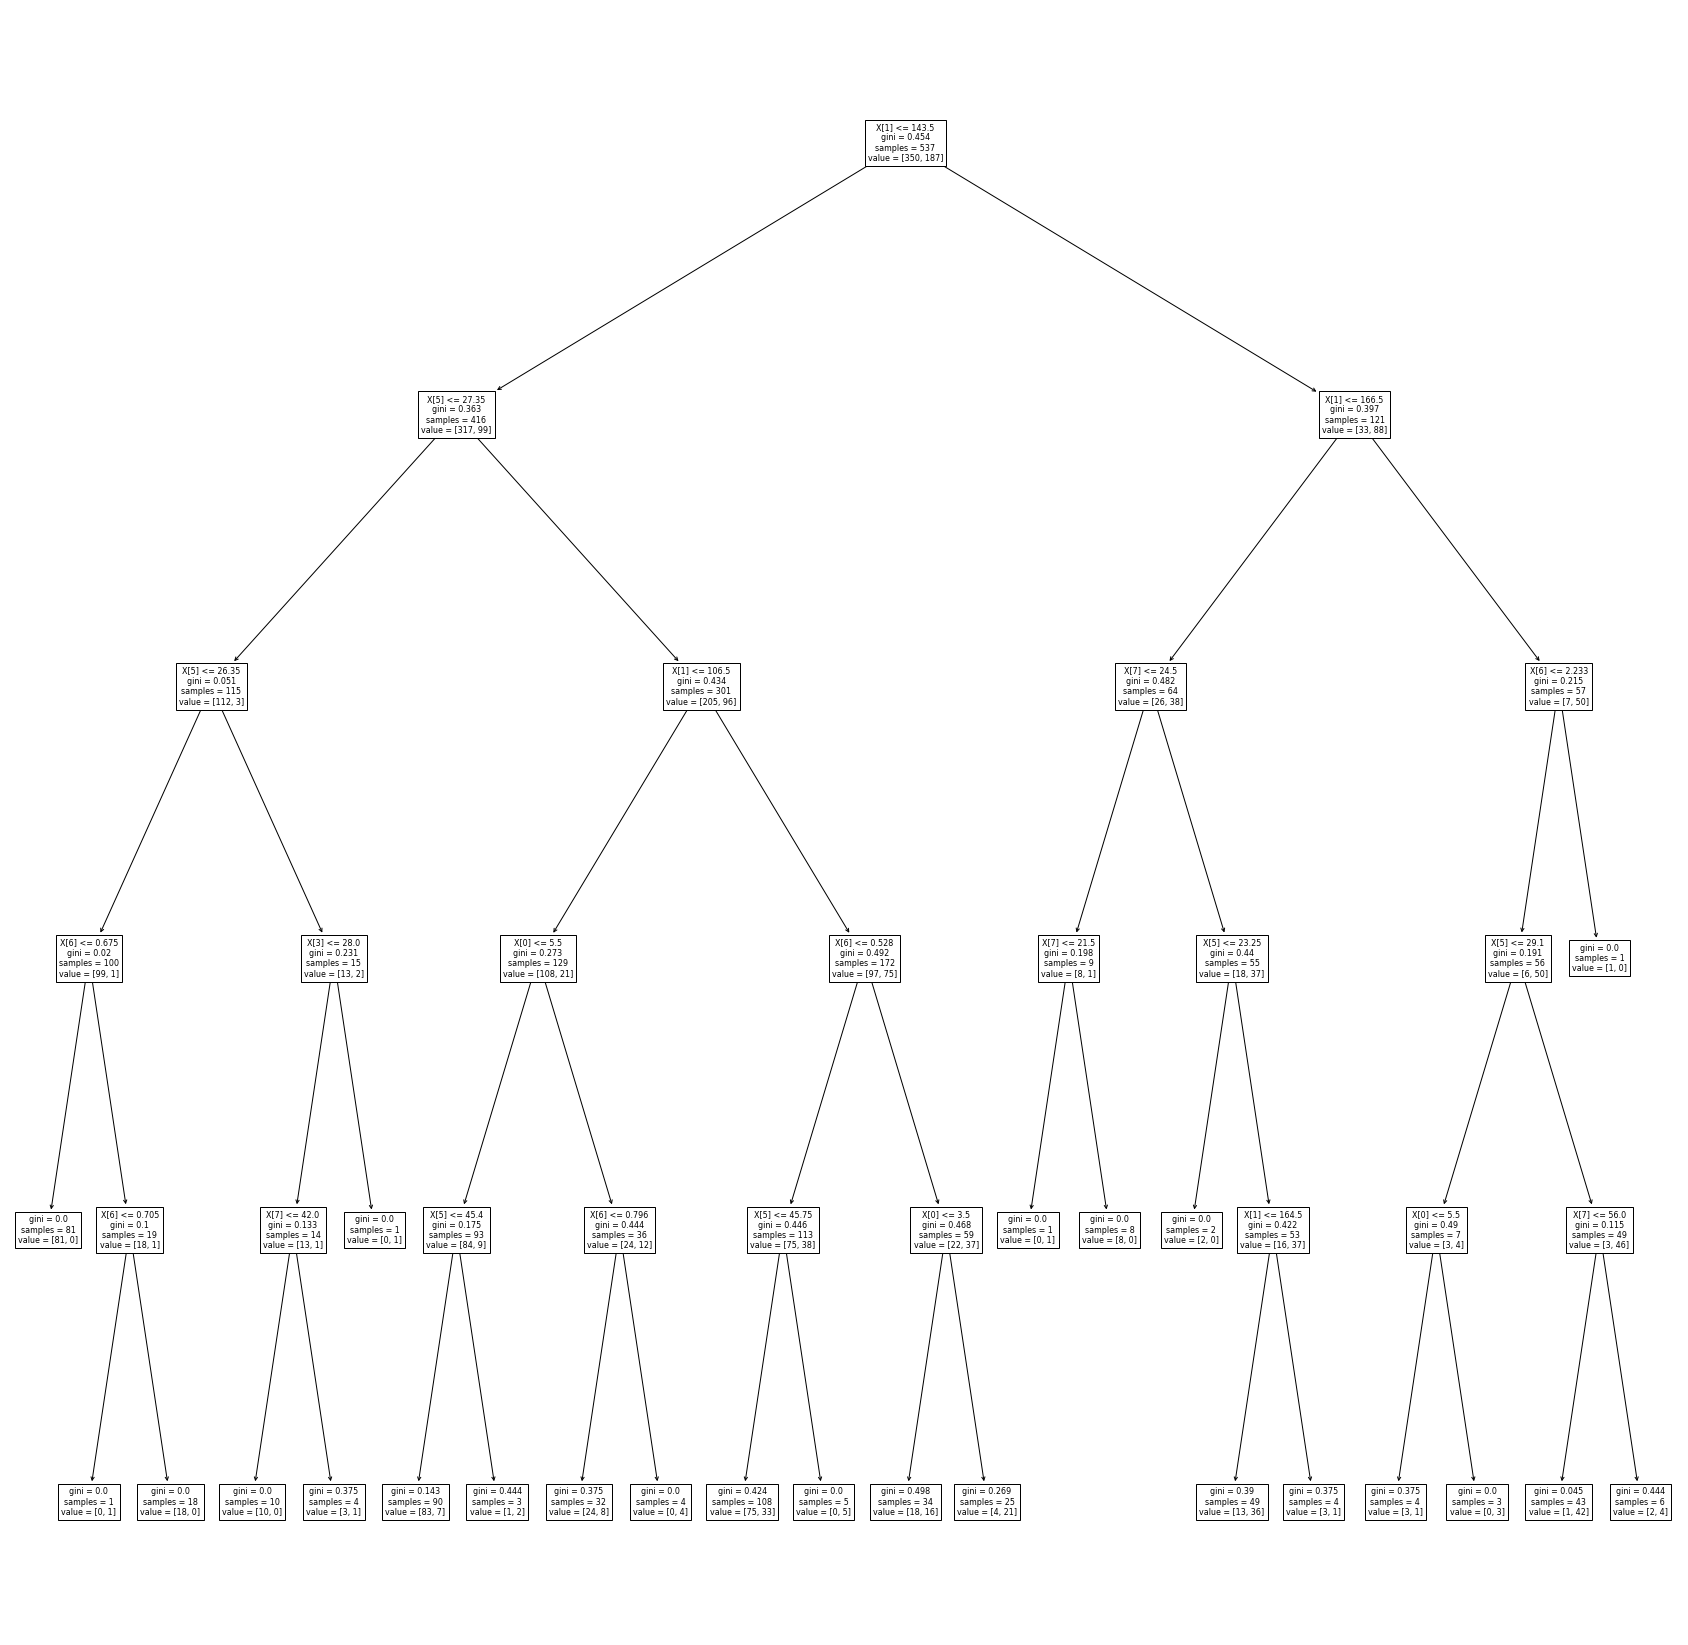

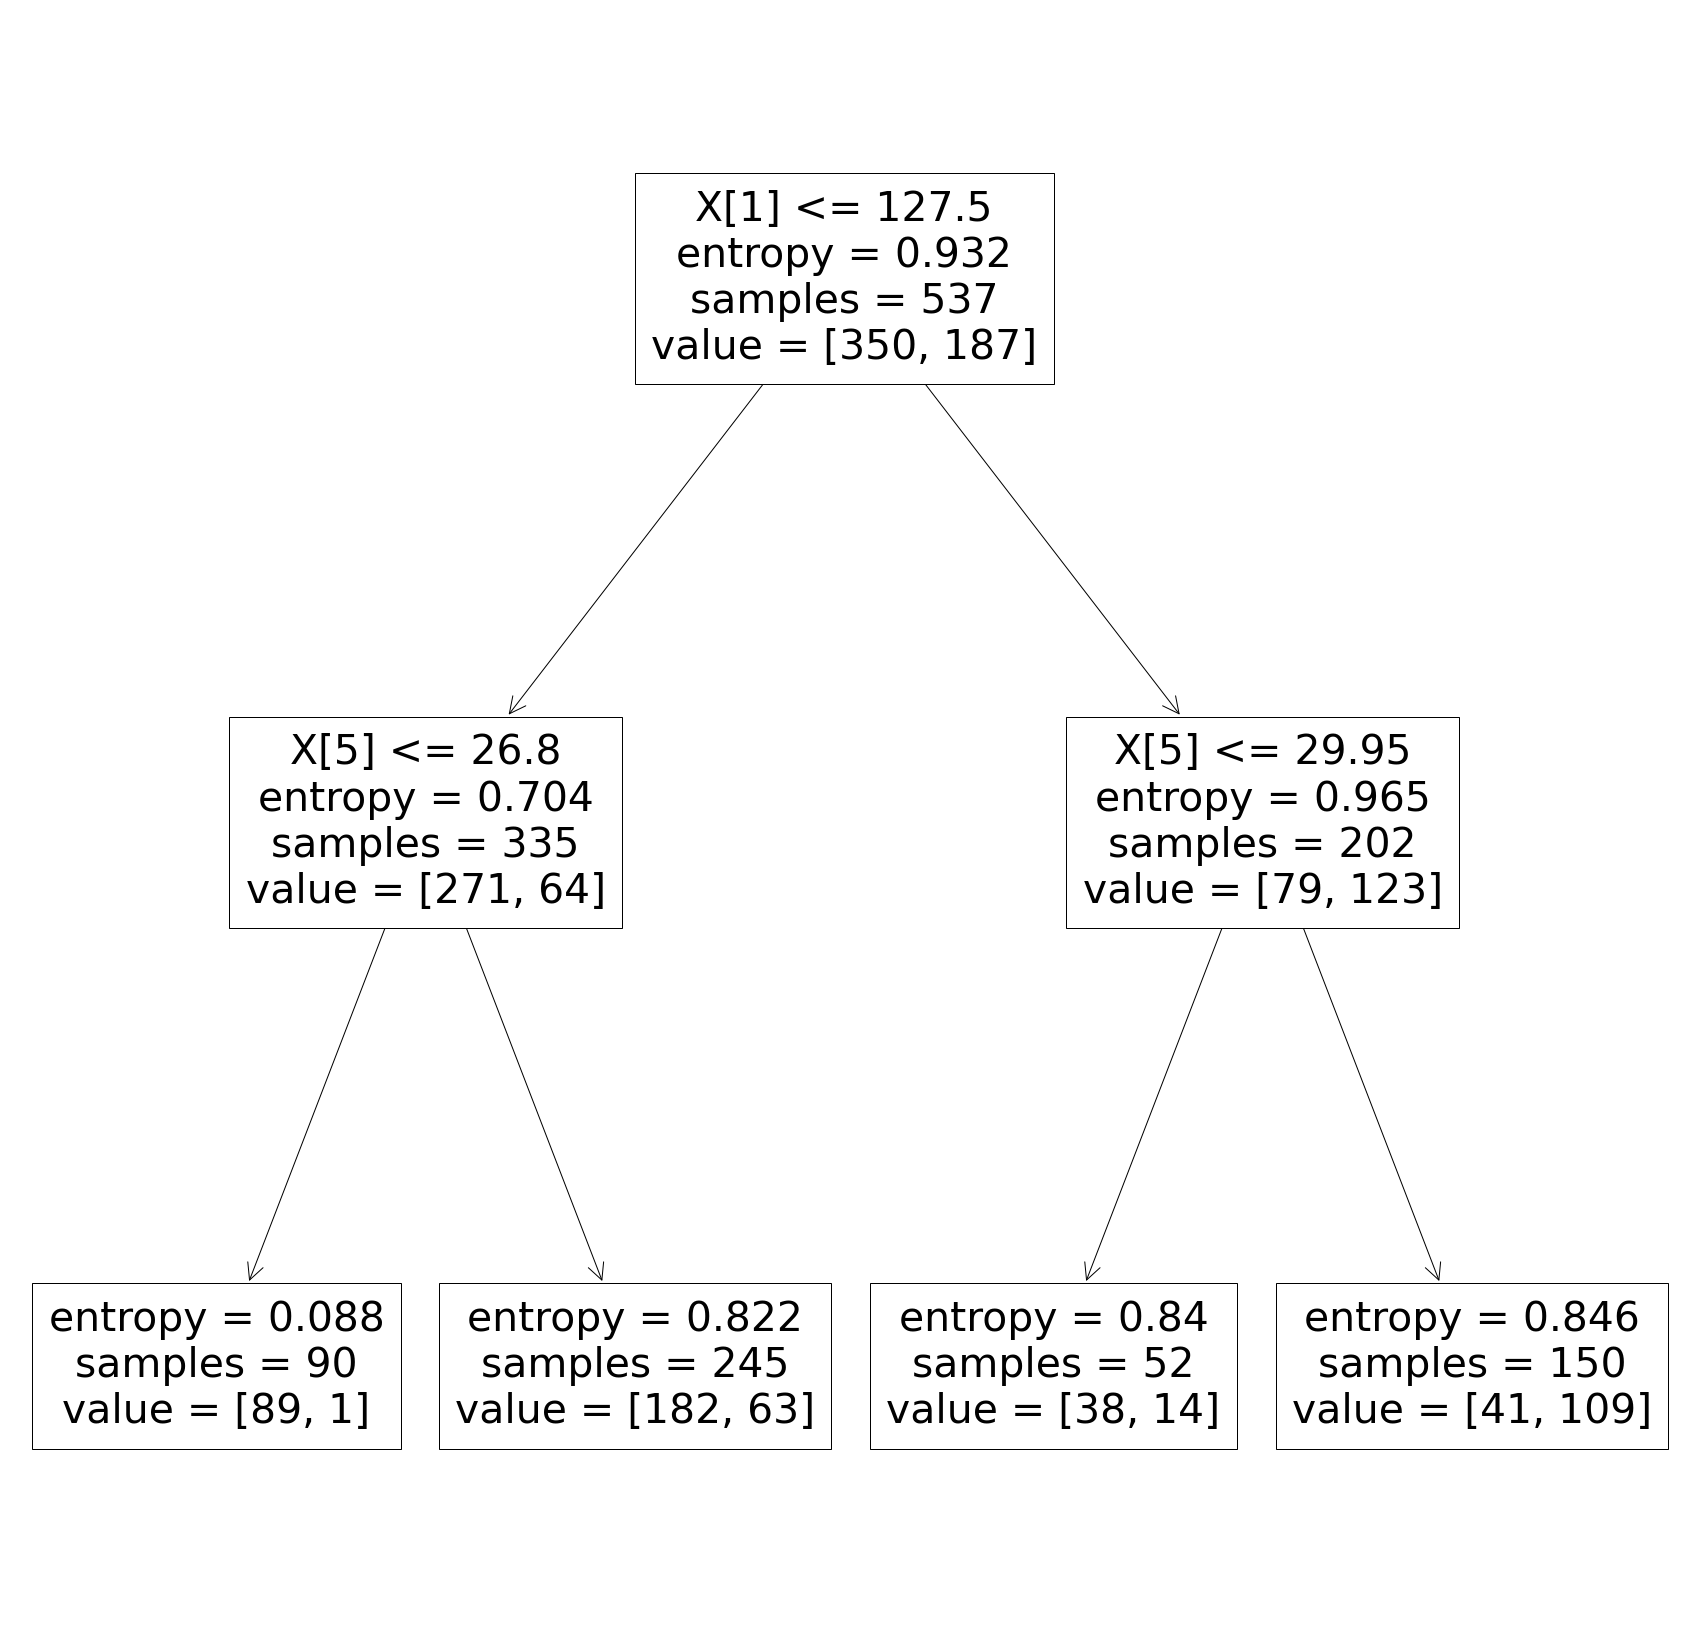

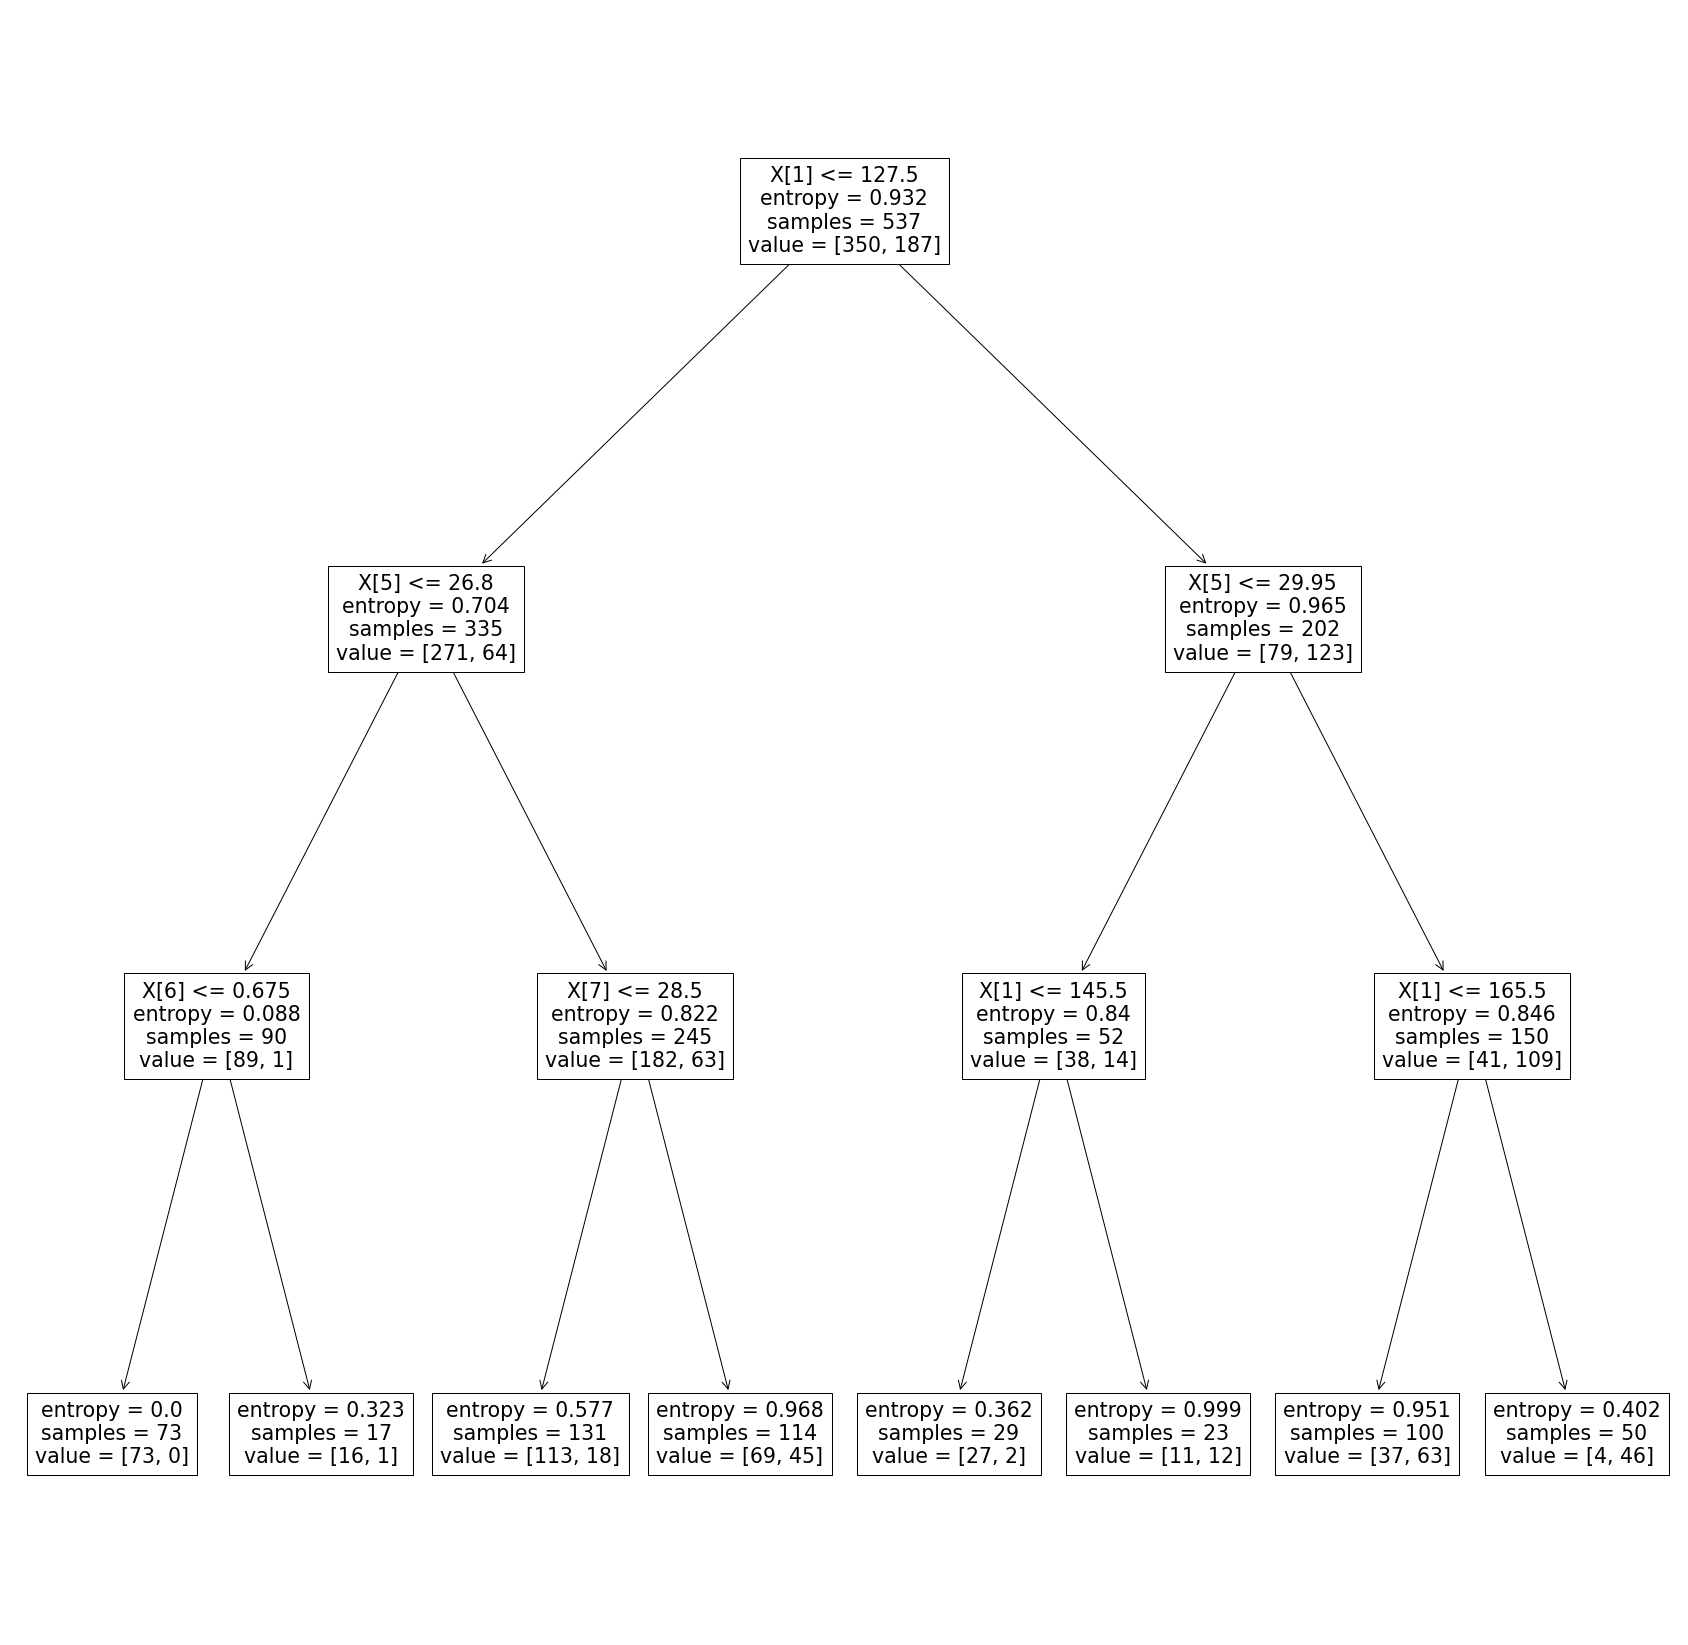

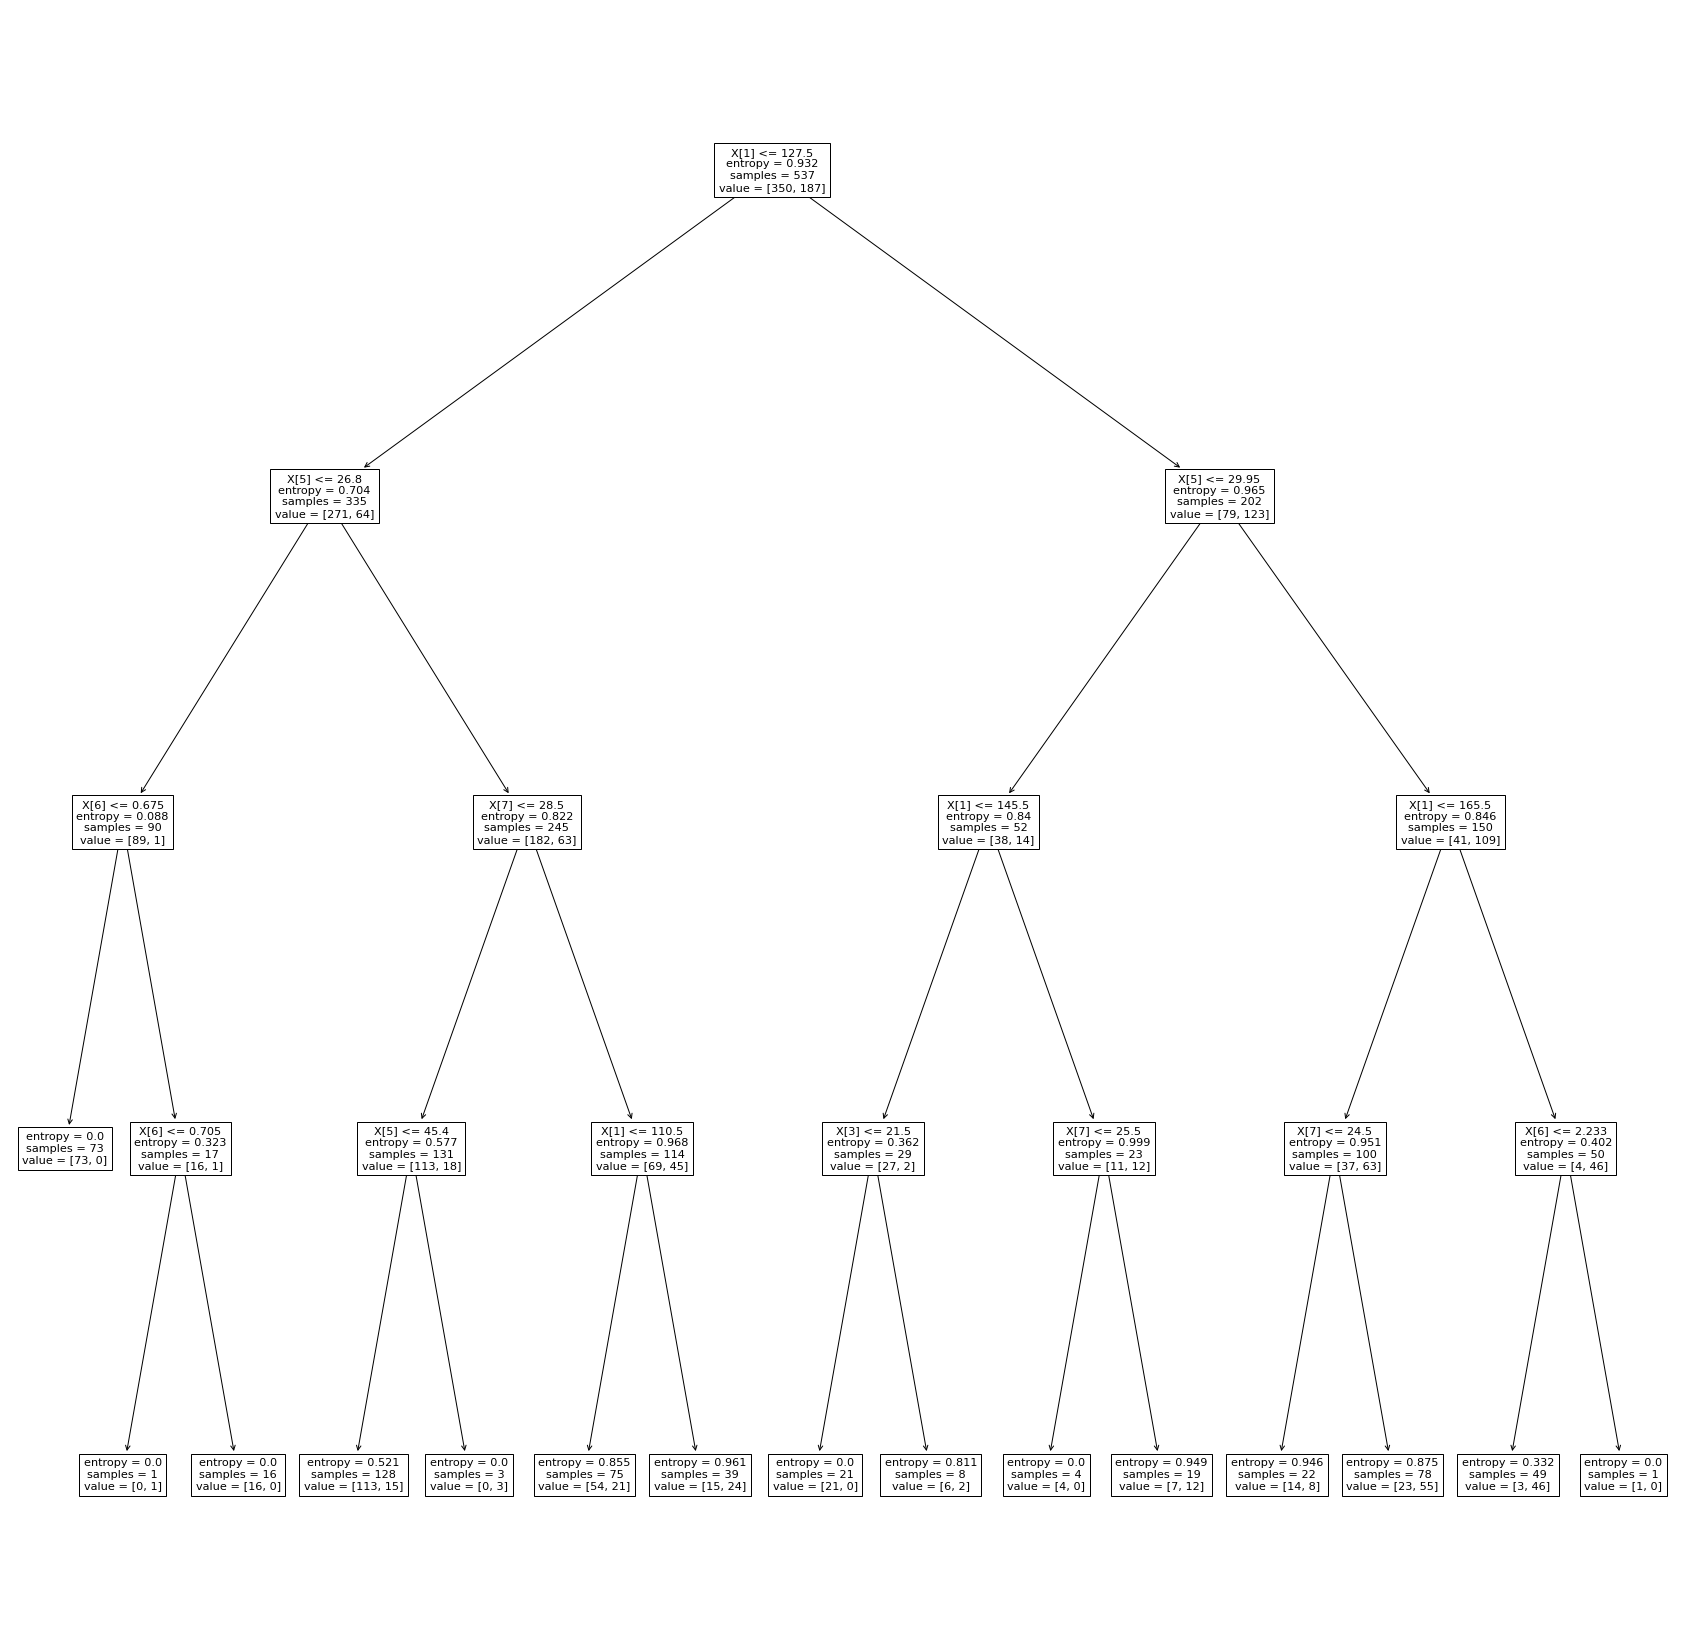

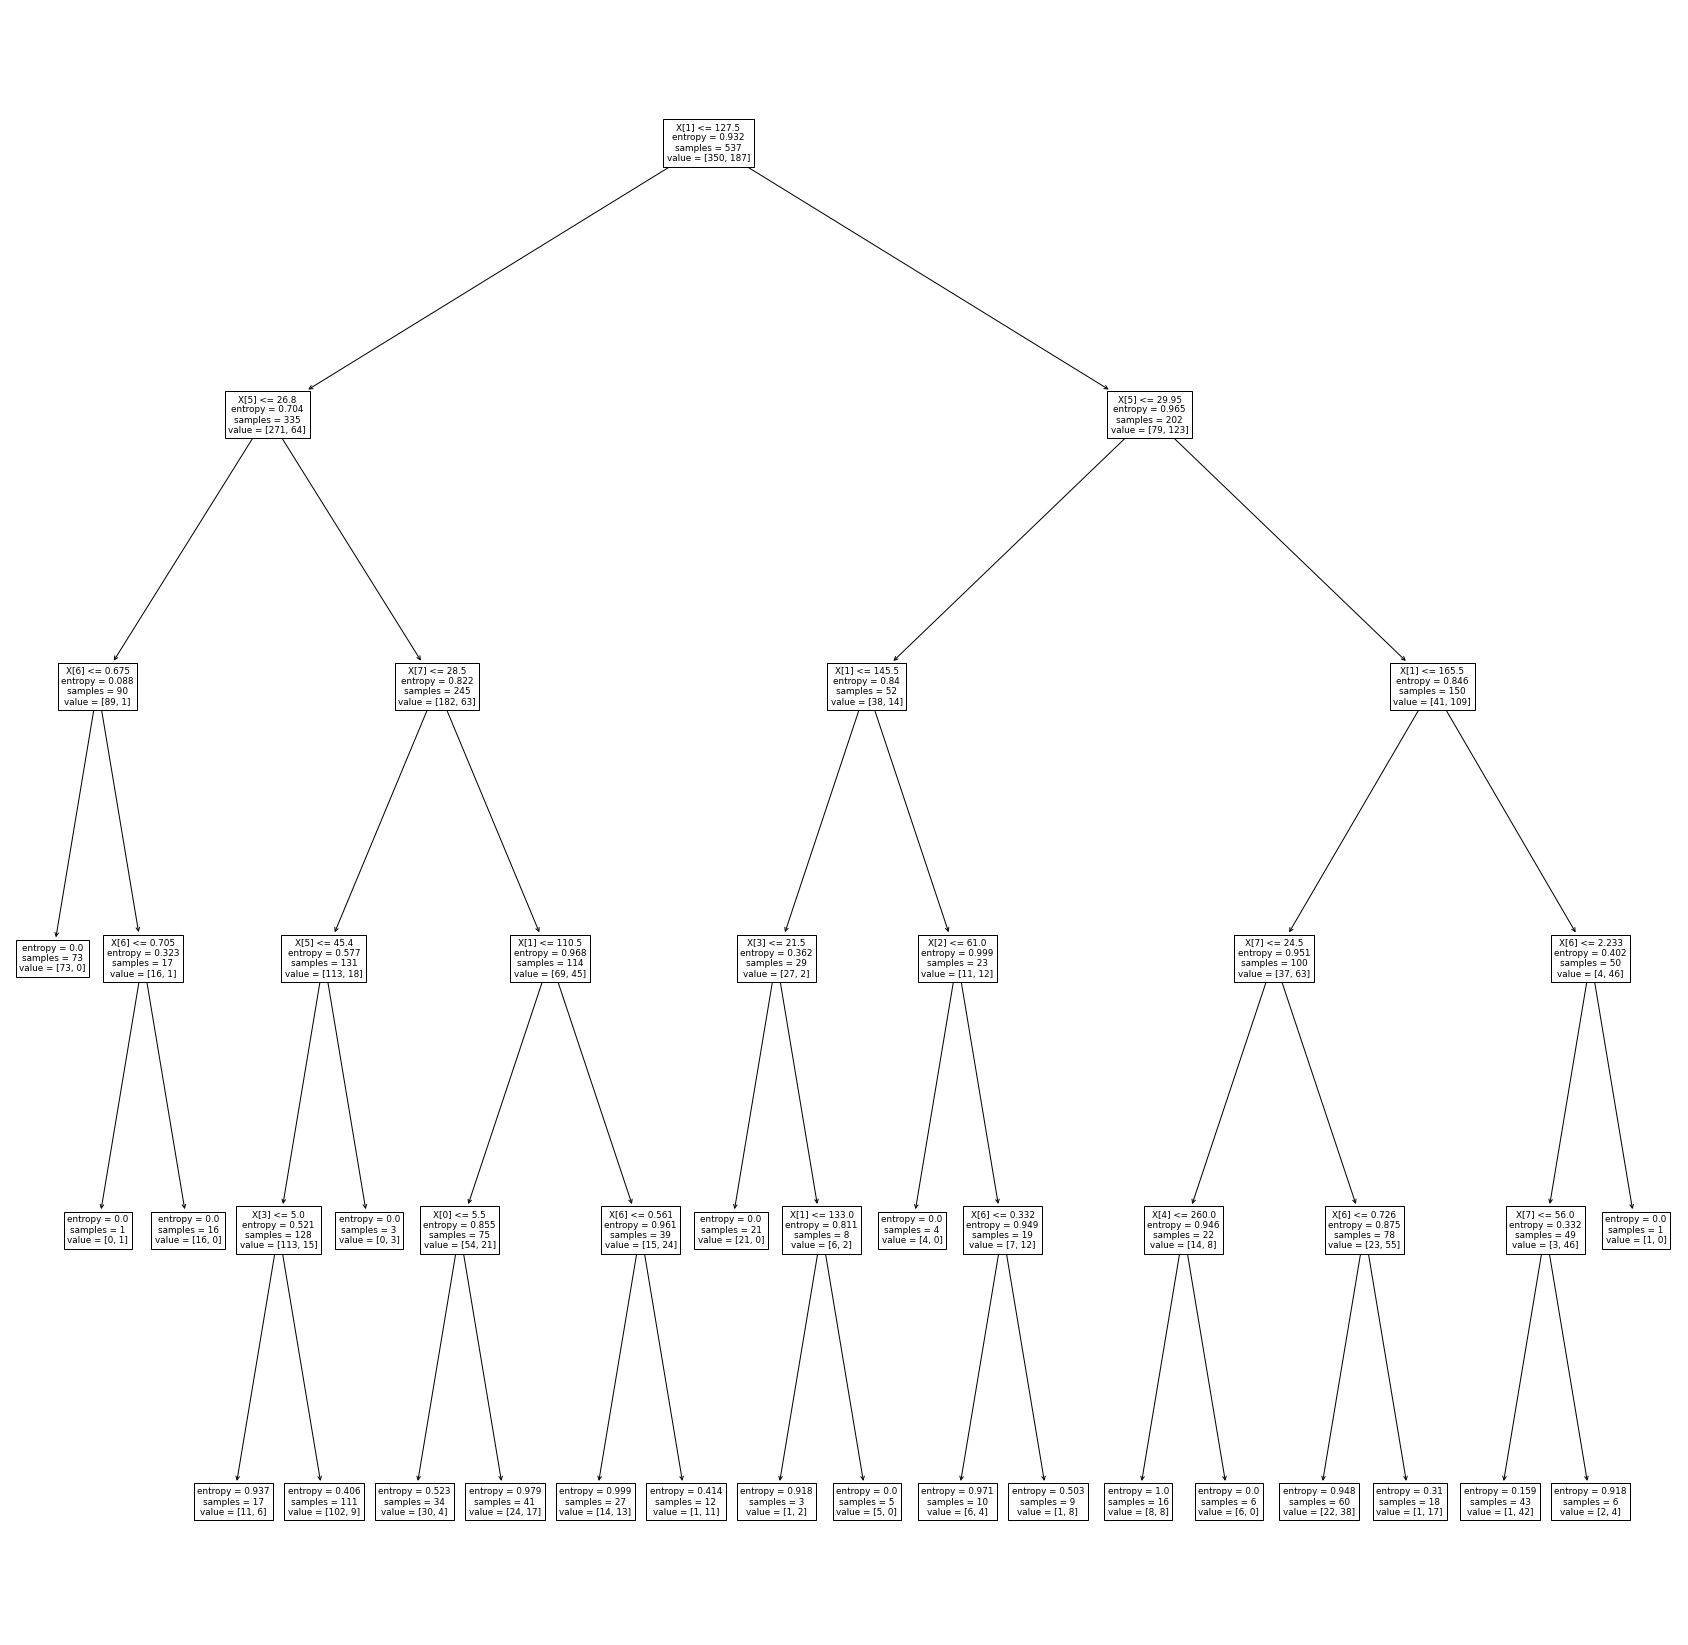

<Figure size 2160x2160 with 0 Axes>

In [101]:
columnNames = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
count = 0
for c in criterion:
    for d in depth:
        count+=1
        tree_model = DecisionTreeClassifier(criterion=c, 
                                    max_depth=d, 
                                    random_state=1)
        tree_model.fit(x_train, y_train)

        X_combined = np.vstack((x_train, x_test))
        y_combined = np.vstack((y_train, y_test))
        #plot_decision_regions(X_combined, y_combined, classifier=tree_model,)

        #plt.xlabel('petal length [cm]')
        #plt.ylabel('petal width [cm]')
        #plt.legend(loc='upper left')
        #plt.tight_layout()
        #plt.savefig('images/03_20.png', dpi=300)
        #plt.show()

        tree.plot_tree(tree_model)
        plt.savefig('tree %d.png' % count, )
        plt.gcf()
        plt.figure(figsize = (30,30))
        #plt.show()
        
        score = tree_model.score(x_test,y_test)
        featureImp = tree_model.feature_importances_
        
        
            
        print("\n\nAccuracy for", c, "with depth ", d, ": ", score)
        print("Feature Importances: \n")
        for i in range(0,8):
            print(columnNames[i] + ': ' + str(featureImp[i]))
        

## Build Random Forest

### Number of estimators/trees

In [103]:
ests = [i for i in range(50,200,5)]

### Testing different criterions and number of trees for random forest.

In [109]:
for c in criterion:
    for e in ests:
        forest = RandomForestClassifier(criterion=c, n_estimators=e, bootstrap = True)
        forest.fit(x_train, y_train)
        features = list(forest.feature_importances_)
        name = columnNames[features.index(max(features))]
        print('Criteria: ' + c + "\t n estimators: " + str(e) + "\t Most Important Feature: " + name + '\n Accuracy: ' + str(forest.score(x_test, y_test)))

<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 50	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 55	 Most Important Feature: Glucose
 Accuracy: 0.7359307359307359
Criteria: gini	 n estimators: 60	 Most Important Feature: Glucose
 Accuracy: 0.7489177489177489


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)
<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)
<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 65	 Most Important Feature: Glucose
 Accuracy: 0.7748917748917749
Criteria: gini	 n estimators: 70	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 75	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 80	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 85	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 90	 Most Important Feature: Glucose
 Accuracy: 0.7445887445887446


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 95	 Most Important Feature: Glucose
 Accuracy: 0.7445887445887446


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 100	 Most Important Feature: Glucose
 Accuracy: 0.7705627705627706


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 105	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 110	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 115	 Most Important Feature: Glucose
 Accuracy: 0.7705627705627706


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 120	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 125	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 130	 Most Important Feature: Glucose
 Accuracy: 0.7748917748917749


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 135	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 140	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 145	 Most Important Feature: Glucose
 Accuracy: 0.7489177489177489


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 150	 Most Important Feature: Glucose
 Accuracy: 0.7705627705627706


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 155	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 160	 Most Important Feature: Glucose
 Accuracy: 0.7489177489177489


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 165	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 170	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 175	 Most Important Feature: Glucose
 Accuracy: 0.7705627705627706


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 180	 Most Important Feature: Glucose
 Accuracy: 0.7748917748917749


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 185	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 190	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: gini	 n estimators: 195	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619
Criteria: entropy	 n estimators: 50	 Most Important Feature: Glucose
 Accuracy: 0.7445887445887446


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)
<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 55	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 60	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 65	 Most Important Feature: Glucose
 Accuracy: 0.7792207792207793


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 70	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 75	 Most Important Feature: Glucose
 Accuracy: 0.7792207792207793


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 80	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 85	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 90	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 95	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 100	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 105	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 110	 Most Important Feature: Glucose
 Accuracy: 0.7878787878787878


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 115	 Most Important Feature: Glucose
 Accuracy: 0.7748917748917749


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 120	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 125	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 130	 Most Important Feature: Glucose
 Accuracy: 0.7792207792207793


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 135	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 140	 Most Important Feature: Glucose
 Accuracy: 0.7748917748917749


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 145	 Most Important Feature: Glucose
 Accuracy: 0.7575757575757576


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 150	 Most Important Feature: Glucose
 Accuracy: 0.7835497835497836


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 155	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 160	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 165	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 170	 Most Important Feature: Glucose
 Accuracy: 0.7662337662337663


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 175	 Most Important Feature: Glucose
 Accuracy: 0.7705627705627706


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 180	 Most Important Feature: Glucose
 Accuracy: 0.7619047619047619


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 185	 Most Important Feature: Glucose
 Accuracy: 0.7878787878787878


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 190	 Most Important Feature: Glucose
 Accuracy: 0.7532467532467533


<ipython-input-109-0f549e05cfd8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


Criteria: entropy	 n estimators: 195	 Most Important Feature: Glucose
 Accuracy: 0.7748917748917749


### Based on our analysis we found glucose levels was the most important factor in classifcation of diabetes. Our best accuracy was 0.78 using a gini impurity measure. This was the best score we could find based on different impurity measures and tree depths.